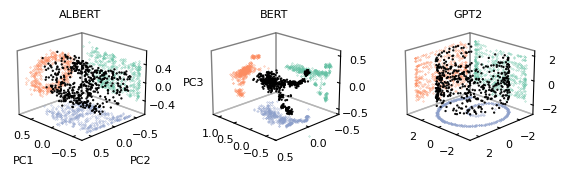

In [ ]:
# ----- NEWEST VERSION -----
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib.transforms import ScaledTranslation
from string import ascii_lowercase

MARKERSIZE = 0.4
BIGGER_SIZE = 8
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
TICKPAD = -1
LABELPAD = -1.2
TITLEHEIGHT = 1

def simple_model_load(pretrained_model_name):

    if pretrained_model_name == 'bert-base-uncased':
        from transformers import BertModel, BertTokenizer

        tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
        pretrained_model = BertModel.from_pretrained(pretrained_model_name)

    elif pretrained_model_name == 'gpt2':
        # from transformers import GPT2, GPT2Tokenizer
        # tokenizer = tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name)
        # pretrained_model = GPT2.from_pretrained(pretrained_model_name)

        from transformers import AutoModelForCausalLM, AutoTokenizer
        tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
        pretrained_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name)

    elif pretrained_model_name == 'albert-base-v1':
        from transformers import AlbertTokenizer, AlbertModel
        tokenizer = AlbertTokenizer.from_pretrained(pretrained_model_name)
        pretrained_model = AlbertModel.from_pretrained(pretrained_model_name)

    return tokenizer, pretrained_model

# Text generated from ChatGPT
text = """The sun was just beginning to dip below the horizon when Emily decided to set up camp. She had been hiking for hours, her legs heavy with fatigue and her mind weighed down by thoughts. The dense forest around her seemed to whisper with every breeze, the rustling of leaves creating a symphony of nature. She chose a small clearing beside a babbling brook, a place where the ground was soft and the sound of the water was soothing. As she built her fire, she reflected on why she had come here in the first place. Life in the city had become too noisy, too chaotic, filled with the incessant demands of work, social obligations, and a constant barrage of information. She needed an escape, a chance to reconnect with herself and find clarity. A friend had told her about the Hidden Valley, a place untouched by civilization, where one could find true solitude. It had sounded like exactly what she needed. The first few days of her trek had been filled with excitement and anticipation. The forest was alive with the scent of pine, the chirping of birds, and the occasional glimpse of a deer or rabbit darting through the underbrush. But as she delved deeper into the wilderness, the forest had grown thicker, the trails narrower, and the silence heavier. It was as if she were entering a different world, one that had been forgotten by time. Tonight, though, something felt different. There was an unusual stillness in the air, a kind of anticipatory hush that made the hair on the back of her neck stand up. She couldn’t shake the feeling that she was being watched. She scanned the surrounding trees, their dark silhouettes standing stark against the dimming sky, but saw nothing out of the ordinary. Still, the unease lingered. After a simple dinner of beans and rice, Emily settled into her tent, hoping sleep would come quickly. But as she lay there, staring up at the fabric of her tent, she felt a presence—something or someone nearby. She held her breath and listened. At first, there was nothing but the sound of the brook. Then, she heard it—a soft, almost imperceptible rustling, like footsteps moving carefully through the undergrowth. Her heart began to race. She reached for the flashlight beside her and slowly unzipped the tent flap, peering into the darkness."""
# This is 478, 482, 485 tokens for 'albert-base-v1', 'bert-base-uncased', 'gpt2', respectively.

# 3D PCA
pretrained_model_names = ['albert-base-v1', 'bert-base-uncased', 'gpt2']
# pretrained_model_names = ['albert-base-v1', 'gpt2', 'bert-base-uncased']
colors = list(mcolors.TABLEAU_COLORS.keys())

# figure set up
nrows, ncols = 1,len(pretrained_model_names)
fig, axs = plt.subplots(nrows, ncols,subplot_kw=dict(projection='3d'))
fig.set_size_inches(6,1.7)

if nrows == 1:
    axs = axs[np.newaxis, :]

n_components = 3
total_figs = 0
for col_idx, pretrained_model_name in enumerate(pretrained_model_names):

    ax = axs[0, col_idx]
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.view_init(elev=20, azim=135)

    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4

    # Adjust padding for x-axis tick labels
    ax.tick_params(axis='x', pad=TICKPAD)
    ax.tick_params(axis='y', pad=TICKPAD)
    ax.tick_params(axis='z', pad=TICKPAD)

    tokenizer, pretrained_model = simple_model_load(pretrained_model_name)

    # Tokenize
    inputs = tokenizer(text,return_tensors="pt")
    input_ids = inputs['input_ids']

    # Compute embeddings
    if 'gpt' not in pretrained_model_name:
        token_embeddings = pretrained_model.embeddings.word_embeddings(input_ids)
        position_ids = torch.arange(input_ids.size(1), dtype=torch.long)
        position_embeddings = pretrained_model.embeddings.position_embeddings(position_ids)
        embeddings = (token_embeddings + position_embeddings).squeeze()
        # embeddings = (token_embeddings).squeeze()

        # W_word = pretrained_model.embeddings.word_embeddings.weight.data
        # W_pos = pretrained_model.embeddings.word_embeddings.weight.data
    else:
        token_embeddings = pretrained_model.transformer.wte(input_ids)
        position_ids = torch.arange(input_ids.size(1), dtype=torch.long)
        position_embeddings = pretrained_model.transformer.wpe(position_ids)
        embeddings = (token_embeddings + position_embeddings).squeeze()
        # embeddings = (token_embeddings).squeeze()

        # W_word = pretrained_model.transformer.wte.weight.data
        # W_pos = pretrained_model.embeddings.word_embeddings.weight.data

    pca = PCA(n_components=n_components)
    #pca.fit(W_word.detach().numpy())
    # pca_results = pca.fit_transform(W_word.detach().numpy())
    # data = StandardScaler().fit_transform(embeddings.detach().numpy()) # Normalise
    data = embeddings.detach().numpy() # No normalise
    pca_results = pca.fit_transform(data)

    x, y, z = pca_results.T
    if col_idx == 0:
        x = -x
    ax.scatter(x,y,z, c='k', alpha=1, s=MARKERSIZE)

    # Axes
    if col_idx == 0:
        axs[0,0].set_xlim([-0.7, 0.8])
        axs[0,0].set_ylim([-0.7, 0.7])
        axs[0,0].set_zlim([-0.7, 0.7])
        axs[0,0].set_xticks([-0.5, 0, 0.5])
        axs[0,0].set_yticks([-0.5, 0, 0.5])
        axs[0,0].set_zticks([-0.4, 0, 0.4])
    elif col_idx == 1:
        axs[0,1].set_xlim([-0.8, 1.2])
        axs[0,1].set_ylim([-0.5,0.5]) # Omit single outlier for nicer visualiation...
        axs[0,1].set_zlim([-0.6,0.6])
        # axs[0,1].set_xticks([-0.5,0,0.5, 1])
        axs[0,1].set_yticks([-0.5,0,0.5])
        axs[0,1].set_zticks([-0.5,0,0.5])
    else:
        axs[0,2].set_xticks([-2, 0, 2])
        axs[0,2].set_yticks([-2, 0, 2])
        axs[0,2].set_zticks([-2, 0, 2])

    # # Projections
    ax.plot(x, z, '.', c='#66c2a5', zdir='y', zs=ax.get_ylim()[0], markersize=0.5)
    ax.plot(y, z, '.', c='#fc8d62', zdir='x', zs=ax.get_xlim()[1], markersize=0.5)
    ax.plot(x, y, '.', c='#8da0cb', zdir='z', zs=ax.get_zlim()[0], markersize=0.5)

    if col_idx == 0:
        ax.set_xlabel('PC1', labelpad=LABELPAD)
        ax.set_ylabel('PC2', labelpad=LABELPAD)
        ax.set_zlabel('PC3', labelpad=LABELPAD)
        # ax.zaxis.set_label_position("upper")
    # ax.set_title(pretrained_model_name)
    ax.set_title(pretrained_model_name.split('-')[0].upper(), y=TITLEHEIGHT)
    # ax.text2D(
    #     0.0, 1.0, f'({ascii_lowercase[total_figs]})', transform=(
    #         ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
    #     va='bottom')  #  , fontfamily='sans-serif', fontsize=14

    total_figs += 1

plt.tight_layout()
plt.savefig('pretrained_word_embeddings.pdf', bbox_inches='tight')
plt.show()